In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import recall_score, mean_squared_error, make_scorer, plot_precision_recall_curve
from sklearn.model_selection import train_test_split, learning_curve

In [2]:
credit = pd.read_csv("data/credit-approval-ready.csv")

In [3]:
y =  credit['15'].astype("int")
credit_ds = credit.drop('15', axis=1)

pca = PCA(20)
credit_ds = pca.fit_transform(credit_ds)

In [4]:
trainX, testX,  trainY, testY = train_test_split(credit_ds, y, test_size=0.5)

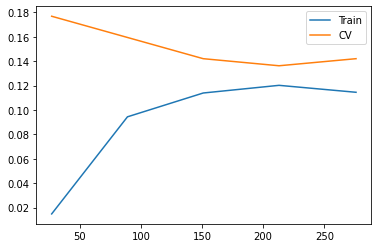

In [5]:
logr = LogisticRegression()
logr.fit(trainX, trainY)

train_size, train_scores, valid_scores, train_times, _ = learning_curve(logr, trainX, trainY, scoring=make_scorer(mean_squared_error), return_times=True)

sns.lineplot(train_size, train_scores.mean(axis=1), label="Train")
sns.lineplot(train_size, valid_scores.mean(axis=1), label="CV")

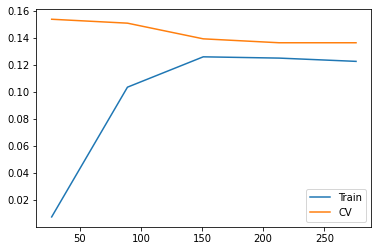

In [6]:
ridge = RidgeClassifier()
ridge.fit(trainX, trainY)

train_size, train_scores, valid_scores, train_times, _ = learning_curve(ridge, trainX, trainY, scoring=make_scorer(mean_squared_error), return_times=True) 

sns.lineplot(train_size, train_scores.mean(axis=1), label="Train")
sns.lineplot(train_size, valid_scores.mean(axis=1), label="CV")

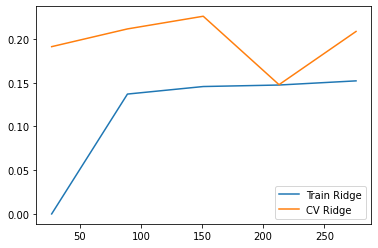

In [7]:
sgd = SGDClassifier()
sgd.fit(trainX, trainY)

train_size, train_scores, valid_scores, train_times, _ = learning_curve(sgd, trainX, trainY, scoring=make_scorer(mean_squared_error), return_times=True) 

sns.lineplot(train_size, train_scores.mean(axis=1), label="Train Ridge")
sns.lineplot(train_size, valid_scores.mean(axis=1), label="CV Ridge")

In [8]:
print(f"Logistic regession MSE: {mean_squared_error(logr.predict(testX), testY)}")
print(f"Ridge MSE: {mean_squared_error(ridge.predict(testX), testY)}")
print(f"SGD MSE: {mean_squared_error(sgd.predict(testX), testY)}")

Logistic regession MSE: 0.14492753623188406
Ridge MSE: 0.14782608695652175
SGD MSE: 0.17681159420289855


In [9]:
print(f"Logistic regession Recall: {recall_score(logr.predict(testX), testY)}")
print(f"Ridge Recall: {recall_score(ridge.predict(testX), testY)}")
print(f"SGD Recall: {recall_score(sgd.predict(testX), testY)}")

Logistic regession Recall: 0.7897727272727273
Ridge Recall: 0.7790055248618785
SGD Recall: 0.7757575757575758


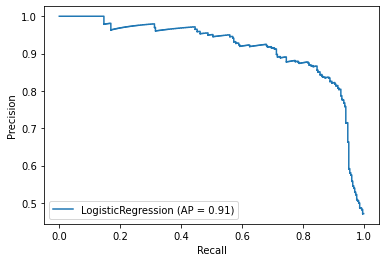

In [10]:
plot_precision_recall_curve(logr, credit_ds, y)

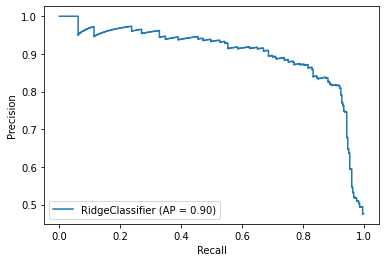

In [11]:
plot_precision_recall_curve(ridge, credit_ds, y)

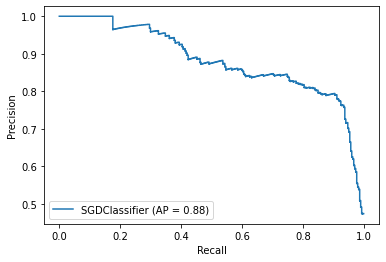

In [12]:
plot_precision_recall_curve(sgd, credit_ds, y)